In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats

# check if the distibution for Proline follows a normal distribution, what is the probability that a sample from wine bottle would have proline content of 1120 units?

In [5]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df.columns=['class','Alcohol','Malic acid ','Ash','Alcalinity of ash ','5) Magnesium ',
            ' Total phenols ','Flavanoids ',') Nonflavanoid phenols ','Proanthocyanins ',
            'Color intensity ','Hue ',')OD280/OD315 of diluted wines ','Proline']

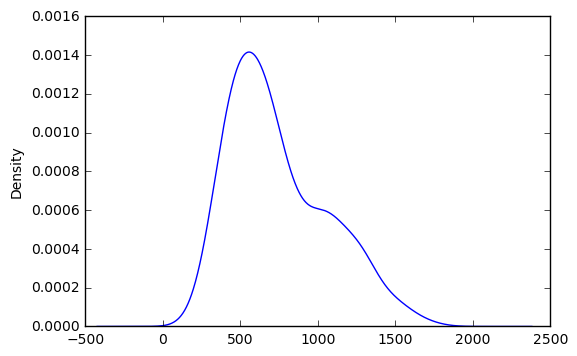

In [11]:
df.Proline.plot(kind='kde')

In [12]:
stats.norm.cdf(1120,df.Proline.mean(),df.Proline.std())
#However distribution is not normal

0.8819544752196522

In [13]:
import seaborn as sns

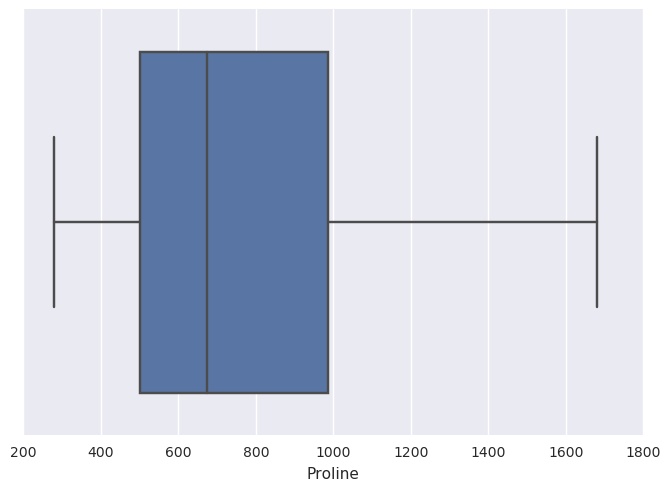

In [19]:
sns.boxplot(x=df.Proline)

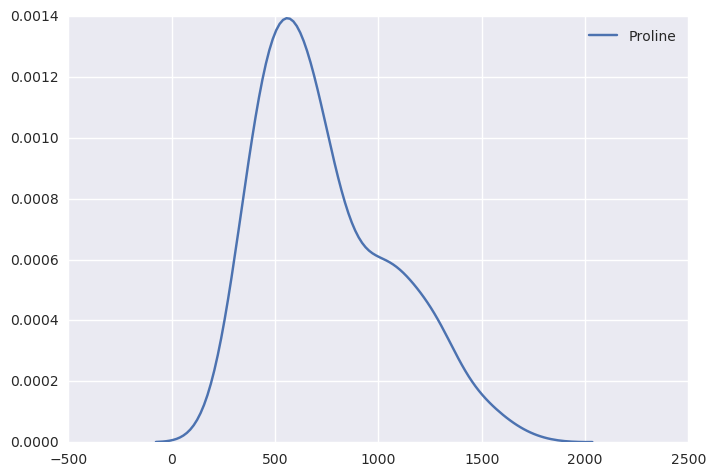

In [17]:
sns.kdeplot(df.Proline)

In [18]:
#If distribution is skewed to right then use log transformation 
#if skewed to left, use square transformation

# Binomial distribution is for BINARY OUTCOME

In [22]:
help(stats.poisson.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(self, *args, **kwargs) method of scipy.stats._discrete_distns.poisson_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    size : int or tuple of ints, optional
        Defining number of random variates (Default is 1).  Note that `size`
        has to be given as keyword, not as positional argument.
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



In [31]:
stats.poisson.rvs(100,size=10)

array([101,  99,  98,  95,  89,  96, 110,  98, 108, 109])

In [39]:
stats.poisson.rvs(1, loc=100, size=10, random_state=None)

array([101, 100, 100, 103, 101, 102, 101, 100, 101, 100])

In [40]:
help(stats.norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(self, x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [52]:
normalrandvar=np.random.randn(10000)

In [45]:
stats.norm.cdf(normalrandvar)

array([ 0.6277902 ,  0.12320214,  0.62347217,  0.36535285,  0.97315796,
        0.90215375,  0.29996892,  0.55902021,  0.21226728,  0.10525593])

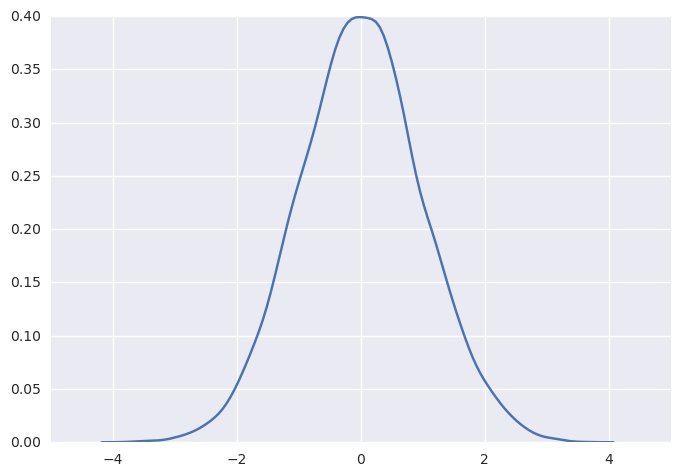

In [53]:
sns.kdeplot(normalrandvar)

In [54]:
stats.norm.cdf(normalrandvar)

array([ 0.57603111,  0.57094679,  0.42393932, ...,  0.44658998,
        0.0513142 ,  0.06653159])

In [85]:
stats.norm.cdf(-80,loc=0,scale=20)

3.1671241833119863e-05

In [86]:
stats.norm.pdf(-80,loc=0,scale=20)

6.6915112882442687e-06

In [89]:
stats.norm.cdf(-1000,loc=0,scale=20) > stats.norm.pdf(-1000,loc=0,scale=20)

False